tamrine 3 machine learning - seyedeh sahar fatemi abhari- shomare daneshjui= 985141058

In [20]:
import scipy.optimize as opt
from sklearn import preprocessing
import pylab as pl
from sklearn.model_selection import train_test_split
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ettelaat ra be surat jadval dar miavarim

In [21]:
df=pd.read_csv("C:\\Users\\Sahar\\Downloads\\yadgiri  mashin\\breast-cancer-wisconsin.csv")
df.columns=['ID','Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit','Class']
df.head(25)

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1002945,4,5,5,4,7,10,3,2,1,2
1,1015425,1,3,1,1,2,2,3,1,1,2
2,1016277,8,6,1,8,3,4,3,7,1,2
3,1017023,1,4,3,1,2,1,3,1,1,2
4,1017122,10,8,8,10,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,1,2,1,2,2,1,3,1,1,2
7,1033078,1,2,1,1,2,1,1,1,5,2
8,1033078,2,4,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

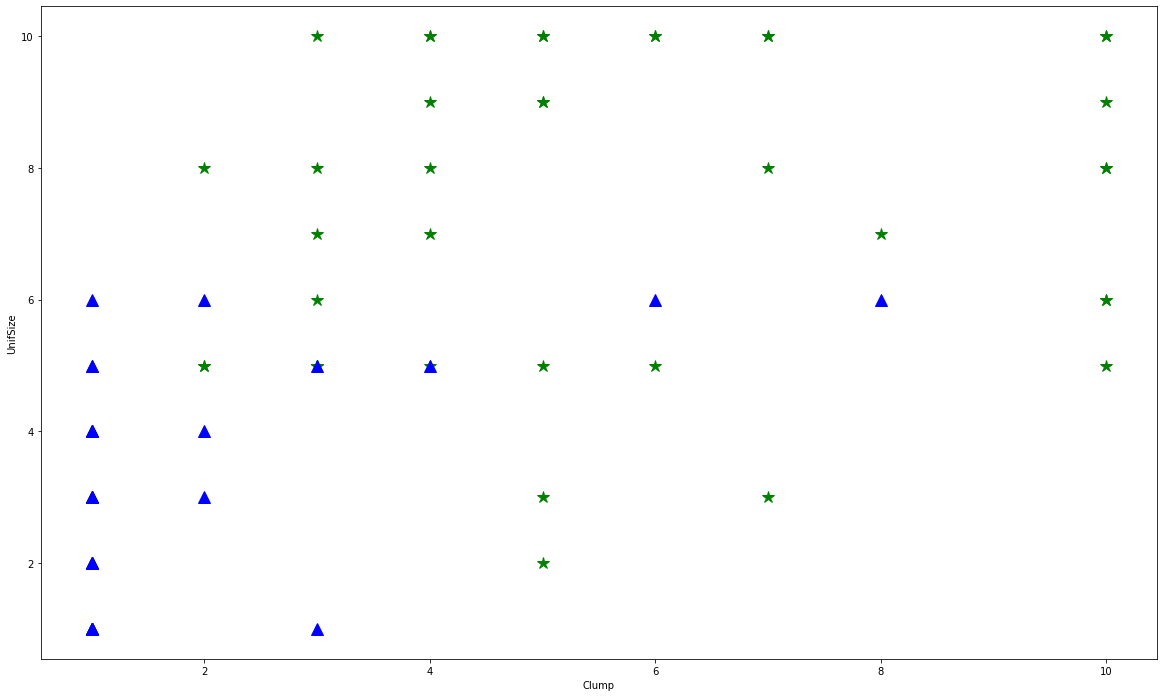

In [22]:
khoshkhim = df[df['Class'] == 2][0:40]
badkhim = df[df['Class'] == 4][0:40]
plt.figure(figsize=(20,12))
plt.plot(badkhim['Clump'],badkhim['UnifSize'], 'g*' ,markersize=12 , label = "badkhim")
plt.plot(khoshkhim['Clump'],khoshkhim['UnifSize'], 'b^' ,markersize=12 , label = "khoshkhim")
plt.ylabel('UnifSize')
plt.xlabel('Clump')
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

mikhahim x va y ra train va test konim

In [26]:
s_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(s_df)
df['Class'] =df['Class'].astype('int')
y = np.asarray(df['Class'])
X_tr, X_te, y_tr, y_te = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_tr.shape,  y_tr.shape)
print ('Test set:', X_te.shape,  y_te.shape)

Train set: (477, 9) (477,)
Test set: (205, 9) (205,)


ebteda raveshe KNN

In [33]:
X_train0 = preprocessing.StandardScaler().fit(X_tr).transform(X_tr.astype(float))
X_test0 = preprocessing.StandardScaler().fit(X_te).transform(X_te.astype(float))
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 4 
H= KNeighborsClassifier(n_neighbors = k).fit(X_train0,y_tr)
H

yhat = H.predict(X_test0)
print(y_tr[0:10])
print(yhat[0:10])
print("Train set Accuracy: ", metrics.accuracy_score(y_tr, H.predict(X_train0)))
print("Test set Accuracy: ", metrics.accuracy_score(y_te, yhat))

[2 4 4 2 4 2 2 4 4 2]
[2 4 2 4 4 2 4 2 4 2]
Train set Accuracy:  0.9706498951781971
Test set Accuracy:  0.9658536585365853


entekhab behtarin K

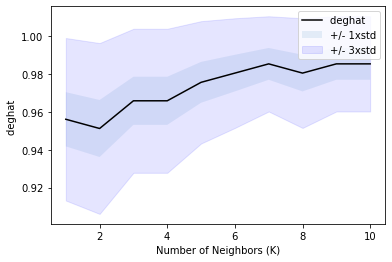

In [46]:
Ks = 11
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):   
    H= KNeighborsClassifier(n_neighbors = n).fit(X_train0,y_tr)
    yhat=H.predict(X_test0)
    mean_acc[n-1] = metrics.accuracy_score(y_te, yhat)
    std_acc[n-1]=np.std(yhat==y_te)/np.sqrt(yhat.shape[0])
plt.plot(range(1,Ks),mean_acc,'black')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('deghat ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('deghat ')
plt.xlabel('Number of Neighbors (K)')
plt.show()

alan raveshe SVM

              precision    recall  f1-score   support

           2       0.99      0.98      0.98       132
           4       0.96      0.99      0.97        73

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[129   3]
 [  1  72]]


0.9805451700070951

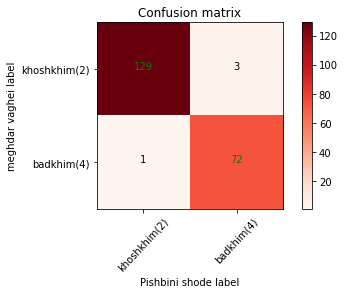

In [69]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
l = svm.SVC(kernel='rbf')
l.fit(X_tr, y_tr) 
y__hat = l.predict(X_te)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=47)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('meghdar vaghei label')
    plt.xlabel('Pishbini shode label')
cf_matrix = confusion_matrix(y_te, yhat, labels=[2,4])
np.set_printoptions(precision=2)
print (classification_report(y_te, y__hat))
plt.figure()
plot_confusion_matrix(cf_matrix, classes=['khoshkhim(2)','badkhim(4)'],normalize= False,  title='Confusion matrix')
from sklearn.metrics import jaccard_score
jaccard_score(y_te, y__hat,pos_label=2)
from sklearn.metrics import f1_score
f1_score(y_te, y__hat, average='weighted') 

baraye har 2 ravesh anjam dadim
